In [23]:
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt

In [4]:
df = pd.read_json('../data/all_data.json', lines=True)

In [9]:
# Export source ip addresses for use in PyGeoIpMap
df['source_ip'].to_csv("out.txt", sep='\n',index=False)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [15]:
reader = geoip2.database.Reader('GeoLite2-City_20191203/GeoLite2-City.mmdb')
countries = {}
for ip in df['source_ip']:
    country = reader.city(ip).country.name
    if country in countries:
        countries[country] += 1
    else:
        countries[country] = 1

([<matplotlib.axis.XTick at 0x7f0f4ddfa160>,
 <a list of 67 Text xticklabel objects>)

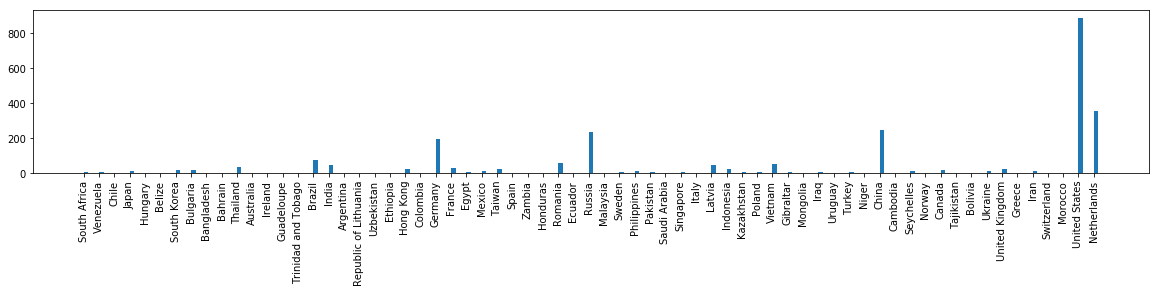

In [28]:
country_list = list(countries.keys())
country_count = []
for country in country_list:
    country_count.append(countries[country])

plt.figure(figsize=(20, 3))  # width:20, height:3
plt.bar(country_list, country_count, align='edge', width=0.3)
plt.xticks(country_list, country_list, rotation='vertical')

# plt.bar(country_list, country_count)
# plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
# plt.show()

In [112]:
# Ignore line below, was messing around with something
#snort_val = df.loc[(df['source_ip'] == '209.17.97.18') & (pd.notna(df['snort']))]['snort'][560]

df

,_id,auth_attempts,destination_ip,destination_port,honeypot,hpfeed_id,identifier,protocol,sensor,session_ssh,snort,source_ip,source_port,timestamp
0,{'$oid': '5de4488cd21d354b96153801'},NaN,172.31.88.57,8088,p0f,{'$oid': '5de4488ad21d354b96153800'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,167.99.166.49,33102,{'$date': '2019-12-01T23:11:06.553Z'}
1,{'$oid': '5de448a4d21d354b96153803'},NaN,172.31.88.57,8088,p0f,{'$oid': '5de448a2d21d354b96153802'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,167.99.170.172,53943,{'$date': '2019-12-01T23:11:30.354Z'}
2,{'$oid': '5de448e0d21d354b96153805'},NaN,172.31.88.57,1433,p0f,{'$oid': '5de448dfd21d354b96153804'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,200.153.11.82,64409,{'$date': '2019-12-01T23:12:31.122Z'}
3,{'$oid': '5de448f5d21d354b96153807'},NaN,172.31.88.57,8181,p0f,{'$oid': '5de448f3d21d354b96153806'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,111.227.172.86,41968,{'$date': '2019-12-01T23:12:51.042Z'}
4,{'$oid': '5de44916d21d354b96153809'},NaN,172.31.88.57,23,p0f,{'$oid': '5de44914d21d354b96153808'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,94.181.181.24,45772,{'$date': '2019-12-01T23:13:24.445Z'}
5,{'$oid': '5de44931d21d354b9615380b'},NaN,172.31.88.57,8088,p0f,{'$oid': '5de4492fd21d354b9615380a'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,167.172.216.119,41960,{'$date': '2019-12-01T23:13:51.538Z'}
6,{'$oid': '5de44970d21d354b9615380d'},NaN,172.31.88.57,30303,p0f,{'$oid': '5de4496fd21d354b9615380c'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,209.17.97.106,34247,{'$date': '2019-12-01T23:14:55.189Z'}
7,{'$oid': '5de449a0d21d354b9615380f'},NaN,172.31.88.57,32084,p0f,{'$oid': '5de4499ed21d354b9615380e'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,185.143.221.186,48389,{'$date': '2019-12-01T23:15:42.002Z'}
8,{'$oid': '5de449d6d21d354b96153811'},NaN,172.31.88.57,23,p0f,{'$oid': '5de449d4d21d354b96153810'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,42.113.244.245,14402,{'$date': '2019-12-01T23:16:36.370Z'}
9,{'$oid': '5de44a81d21d354b96153813'},NaN,172.31.88.57,67,p0f,{'$oid': '5de44a80d21d354b96153812'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,209.17.96.34,63370,{'$date': '2019-12-01T23:19:28.319Z'}


In [21]:
df.shape

(2651, 14)

In [89]:
# Drop non snort datapoints
base_snort = df.dropna(subset=['snort'])
snort_source_ip = base_snort['source_ip'].tolist()
snort = base_snort['snort']

print('snort has {} detections'.format(snort.shape[0]))
snort = pd.io.json.json_normalize(snort)
# snort.sort_values(by='priority', ascending=True)
test = [i for i in range(509)]
snort['source_ip'] = snort_source_ip
snort

# Drop non snort datapoints
#snort = df.dropna(subset=['snort'])
#snort = snort['snort']
# Uncomment line below to reset indices
# snort = snort.reset_index(drop=True)
#print('snort has {} detections'.format(snort.shape[0]))
#snort = pd.io.json.json_normalize(snort)
#snort.sort_values(by='priority', ascending=True)


snort has 509 detections


,classification,header,priority,signature,source_ip
0,3,1:2010936:3,2,ET SCAN Suspicious inbound to Oracle SQL port ...,209.17.97.18
1,30,1:2403478:53518,2,ET CINS Active Threat Intelligence Poor Reputa...,94.102.49.65
2,30,1:2402000:5377,2,ET DROP Dshield Block Listed Source group 1,185.175.93.78
3,30,1:2402000:5377,2,ET DROP Dshield Block Listed Source group 1,185.176.27.246
4,30,1:2403468:53518,2,ET CINS Active Threat Intelligence Poor Reputa...,91.173.121.137
5,3,1:2010935:3,2,ET SCAN Suspicious inbound to MSSQL port 1433,82.200.247.230
6,30,1:2403444:53518,2,ET CINS Active Threat Intelligence Poor Reputa...,82.200.247.230
7,30,1:2403340:53518,2,ET CINS Active Threat Intelligence Poor Reputa...,40.121.109.186
8,30,1:2500020:5265,2,ET COMPROMISED Known Compromised or Hostile Ho...,40.121.109.186
9,30,1:2403438:53518,2,ET CINS Active Threat Intelligence Poor Reputa...,80.82.70.239


In [47]:
ssh = df.dropna(subset=['session_ssh'])
ssh = ssh['session_ssh']
ssh = pd.io.json.json_normalize(ssh)
ssh

,version
0,'SSH-2.0-OpenSSH_7.9p1 Ubuntu-10'
1,'SSH-2.0-OpenSSH_6.7p1 Raspbian-5+deb8u4'
2,'SSH-2.0-OpenSSH_6.7p1 Raspbian-5+deb8u4'
3,None
4,'SSH-2.0-OpenSSH_6.7p1 Raspbian-5+deb8u5'
5,'SSH-2.0-OpenSSH_6.7p1 Raspbian-5+deb8u5'
6,'SSH-2.0-libssh-0.1'
7,'SSH-2.0-libssh-0.1'
8,'SSH-2.0-libssh-0.1'
9,''
